# Task 4.10

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Turn folder path into a string 

path = r'C:\Users\carol\Documents\DA\Data Inmersion\04 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
# Import ords_prods_merged.pkl

orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customs_merged.pkl'))

In [4]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                object 
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int32  
 7   add_to_cart_order      int8   
 8   reordered              int8   
 9   product_name           object 
 10  aisle_id               int8   
 11  department_id          int8   
 12  prices                 float32
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  loyalty_flag           object 
 17  spending_flag          object 
 18  frequency_flag         object 
 19  first_name             object 
 20  last_name              object 
 21  gender                 object 
 22  state           

In [5]:
crosstab = pd.crosstab(orders_products_all['days_since_last_order'], orders_products_all['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### The customers dataset has sensitive personal data about the customers. Due to this concern, the first and last name columns will be dropped from the dataset

In [7]:
orders_products_all = orders_products_all.drop(columns = ['first_name','last_name'])

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [8]:
# Step 1 - Define Regions
region=[]
for value in orders_products_all['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [9]:
# Step 2 - Create a new column

orders_products_all['region'] = region

In [10]:
# Step 3 - Check the result

orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
# Check frequency

orders_products_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 3.1 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [14]:
# Spending habits crossed with frequency flag

spending_habits_frequency = pd.crosstab(orders_products_all['region'], orders_products_all['spending_flag'], dropna = False)

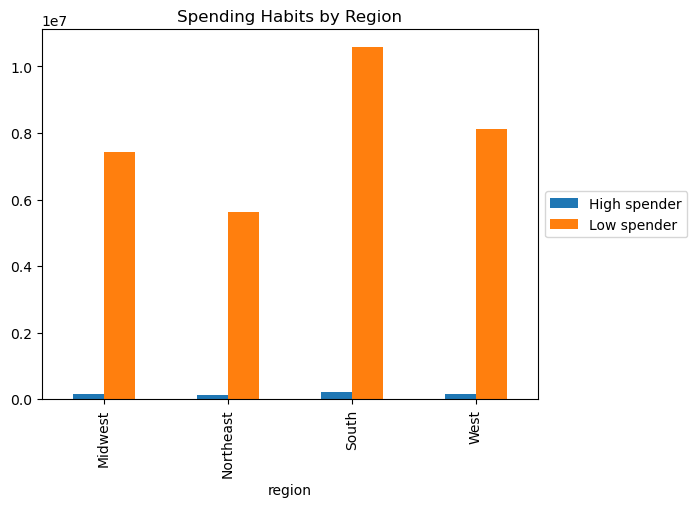

In [15]:
spending_habits_frequency_viz = spending_habits_frequency.plot.bar()
plt.title('Spending Habits by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### The ratio of high-spenders vs low-spenders seems to be consistent across all regions

In [16]:
# Export

spending_habits_frequency_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habits by Region.png'),bbox_inches='tight')

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Create “max_order” column - this was deleted previously due to memory issues

orders_products_all['max_order'] = orders_products_all.groupby(['user_id'])['order_number'].transform(np.max)

In [18]:
# Step 1 - Create a column for customer activity

orders_products_all.loc[orders_products_all['max_order']>=5,'customer_activity']='High_activity_customer'

In [19]:
orders_products_all.loc[orders_products_all['max_order']<5,'customer_activity']='Low_activity_customer'

In [20]:
# Check frequency

orders_products_all['customer_activity'].value_counts(dropna = False)

High_activity_customer    30964564
Low_activity_customer      1440295
Name: customer_activity, dtype: int64

In [21]:
# Step 2 - Create a subset for Low-activity customers and exclude them by exporting the new subset

df_low_act_customs = orders_products_all.loc[orders_products_all['customer_activity'] == 'Low_activity_customer']

In [22]:
# Export

df_low_act_customs.to_pickle(os.path.join(path, '02 Data','Prepared Data','Low_activity_Customers.pkl'))

In [23]:
# Step 3 - Exclude Low_activity_customer from the data

orders_products_all = orders_products_all.loc[orders_products_all ['customer_activity'] == 'High_activity_customer']

In [24]:
# Check frequency

orders_products_all['customer_activity'].value_counts(dropna = False)

High_activity_customer    30964564
Name: customer_activity, dtype: int64

# 5.1 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

## Variables

### a. Age

In [25]:
# Creating a flag for age groups

orders_products_all.loc[orders_products_all['age'] >= 40 & (orders_products_all['age'] < 60), 'age_group'] = 'middle_aged_adult'

In [26]:
orders_products_all.loc[orders_products_all['age'] < 40,'age_group'] = 'young_adult'

In [27]:
orders_products_all.loc[orders_products_all['age'] >= 60,'age_group']='old_adult'

In [28]:
# Check outcome

orders_products_all['age_group'].value_counts()

young_adult          10665110
old_adult            10574504
middle_aged_adult     9724950
Name: age_group, dtype: int64

### b. Income

Text(0.5, 0, 'Income')

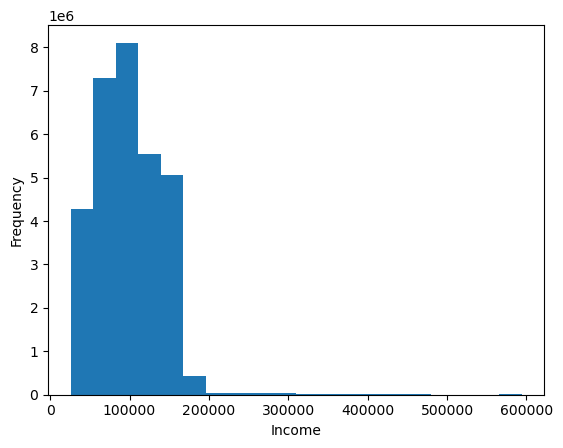

In [29]:
# Create a histogram to check the distribution

income_viz = orders_products_all['income'].plot.hist(bins = 20)
plt.xlabel("Income")

In [30]:
# Export

income_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income.png'),bbox_inches='tight')

In [31]:
# Check income stats

orders_products_all['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### I'll use the 2020 Pew Research Center income brackets:
Lower-income households had incomes less than 48,500;
Upper-income households had incomes greater than 145,500;
Middle-income households fell into a range between those two numbers

In [32]:
# Create an income flag for the three categories

orders_products_all.loc[(orders_products_all['income'] >= 48500 ) & (orders_products_all['income'] < 145500), 'income_group'] = 'middle_income'

In [33]:
orders_products_all.loc[(orders_products_all['income'] >= 145500), 'income_group'] = 'high_income'

In [34]:
orders_products_all.loc[(orders_products_all['income'] < 48500), 'income_group'] = 'low_income'

In [35]:
# Check outcome

orders_products_all['income_group'].value_counts()

middle_income    23128350
high_income       4690090
low_income        3146124
Name: income_group, dtype: int64

### c. Department

In [36]:
# Import department data for crossreferencing

df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [37]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Rename the "Unnamed: 0" column

df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [39]:
# Check outcome

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
# Check data type department_id

df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
# Change data type

df_dept['department_id']=df_dept['department_id'].astype('int8')

In [42]:
# Merge df_dept with df_latest

orders_products_all =orders_products_all.merge(df_dept,on='department_id')

In [43]:
# Check outcome

orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,region,max_order,customer_activity,age_group,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,10,High_activity_customer,young_adult,low_income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,10,High_activity_customer,young_adult,low_income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,10,High_activity_customer,young_adult,low_income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,10,High_activity_customer,young_adult,low_income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,10,High_activity_customer,young_adult,low_income,beverages


Text(0.5, 1.0, 'Number of Orders by Department')

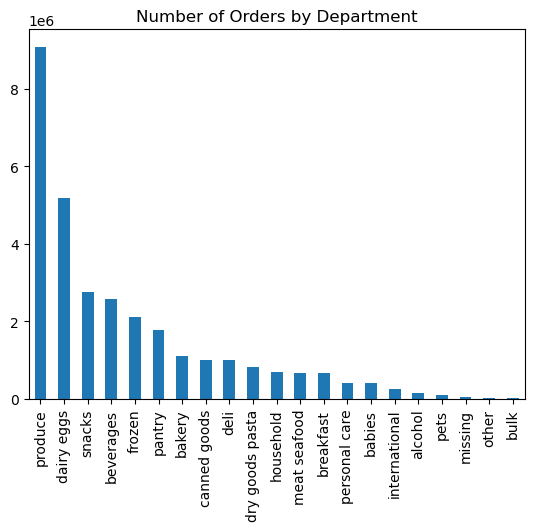

In [44]:
# Create a bar chart

department_bar_chart = orders_products_all['department'].value_counts().plot.bar()
plt.title('Number of Orders by Department')

In [45]:
# Export

department_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar_chart.png'),bbox_inches='tight')

In [46]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_departments = orders_products_all.groupby('department').agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [47]:
crosstab_departments

,order_id,days_since_last_order,prices
,count,mean,mean
department,,,
alcohol,144627,10.006659,8.150699
babies,410392,9.780844,7.634399
bakery,1120828,10.808401,7.857482
beverages,2571901,10.768469,7.682556
breakfast,670850,11.001313,8.031647
bulk,33451,9.880211,8.346919
canned goods,1012074,11.316872,7.546660
dairy eggs,5177182,10.709201,8.336372


In [48]:
crosstab_departments.to_clipboard()

#### I'll create 2 customer profiles based on the departments with the highest and lowst average price: Meat Seafood and Snacks

#### Meat Seafood Variable

In [51]:
# Create a flag to profile Meat Seafood buyers vs non-buyers

orders_products_all.loc[orders_products_all['department_id'] == 12, 'customer'] = 'meat_buyer'

In [52]:
orders_products_all.loc[orders_products_all['department_id'] != 12, 'customer'] = 'meat_non_buyer'

In [54]:
# Use user_id to identify meat buyers

updated_meat_columns = orders_products_all.loc[orders_products_all['customer'] == 'meat_buyer', 'user_id'].unique()

In [55]:
# Update the "customer" column

orders_products_all.loc[orders_products_all['user_id'].isin(updated_meat_columns), 'customer'] = 'meat_buyer'

In [56]:
# Check distribution

orders_products_all['customer'].value_counts()

meat_buyer        23065332
meat_non_buyer     7899232
Name: customer, dtype: int64

#### Snacks Variable

In [210]:
# Create a flag to profile Snack buyers vs non-buyers

orders_products_all.loc[orders_products_all['department_id'] == 19, 'customer_snacks'] = 'snack_buyer'

In [211]:
orders_products_all.loc[orders_products_all['department_id'] != 19, 'customer_snacks'] = 'snack_non_buyer'

In [212]:
# Use user_id to identify snack buyers

updated_snack_columns = orders_products_all.loc[orders_products_all['customer_snacks'] == 'snack_buyer', 'user_id'].unique()

In [213]:
# Update the "customer" column

orders_products_all.loc[orders_products_all['user_id'].isin(updated_snack_columns), 'customer_snacks'] = 'snack_buyer'

In [214]:
# Check distribution

orders_products_all['customer_snacks'].value_counts()

snack_buyer        29852553
snack_non_buyer     1112011
Name: customer_snacks, dtype: int64

### d. Number of Dependents

In [57]:
# Check the different categories in the Family Status column

orders_products_all['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [58]:
# Creating a Family Status flag for each customer 

orders_products_all.loc[(orders_products_all['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (orders_products_all['number_of_dependants']==0), 'family_status_flag'] = 'Single with NO Dependants'

In [59]:
orders_products_all.loc[(orders_products_all['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (orders_products_all['number_of_dependants'] >=1), 'family_status_flag'] = 'Single WITH Dependants'

In [60]:
orders_products_all.loc[(orders_products_all['marital_status'] == 'married') & (orders_products_all['number_of_dependants'] == 1), 'family_status_flag'] = 'Married with NO Dependants'

In [61]:
orders_products_all.loc[(orders_products_all['marital_status'] == 'married') & (orders_products_all['number_of_dependants'] > 1), 'family_status_flag'] = 'Married WITH Dependants'

In [62]:
# Check outcome

orders_products_all['family_status_flag'].value_counts()

Married WITH Dependants       14532650
Single with NO Dependants      7739681
Married with NO Dependants     7211061
Single WITH Dependants         1481172
Name: family_status_flag, dtype: int64

# 5.2 You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Variables

### a. Age

In [63]:
# Check Age Group with orders_day_of_week

age_group_order_days_week = pd.crosstab(orders_products_all['orders_day_of_week'],orders_products_all['age_group'],dropna=False)

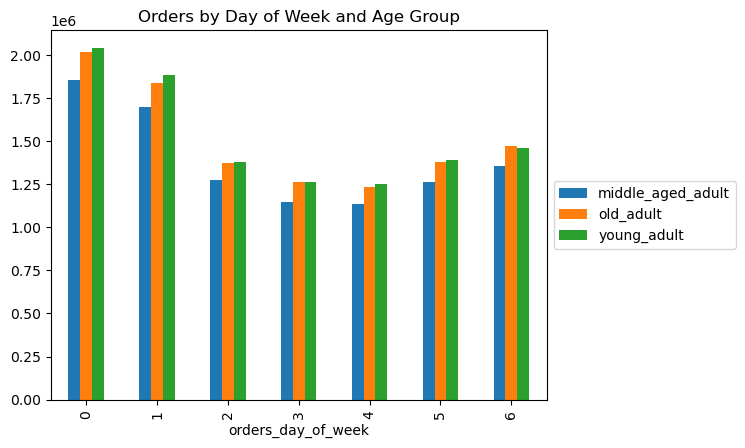

In [64]:
# Create a bar chart between Age Group with orders_day_of_week

age_group_order_days_week_viz = age_group_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [65]:
# Export

age_group_order_days_week_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_order_days_week_viz.png'),bbox_inches='tight')

In [66]:
# Check Age Group with orders_hour_of_day

age_group_order_hour_day = pd.crosstab(orders_products_all['order_hour_of_day'],orders_products_all['age_group'],dropna=False)

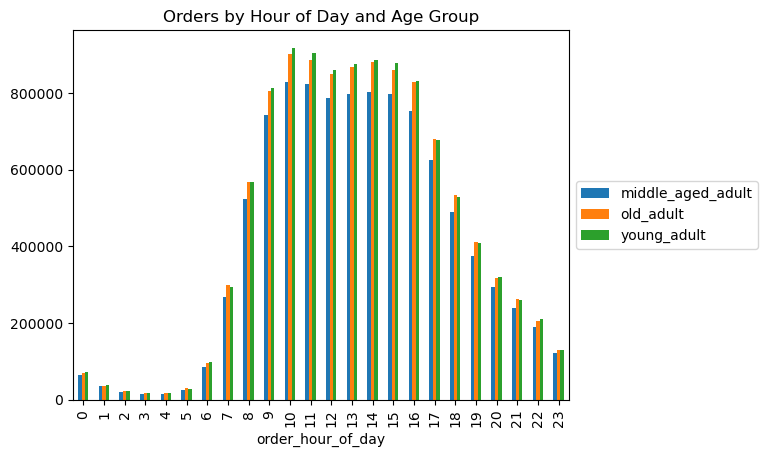

In [67]:
# Create a bar chart between Age Group with orders_day_of_week

age_group_order_hour_day_viz = age_group_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [68]:
# Export

age_group_order_hour_day_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_order_hour_day_viz.png'),bbox_inches='tight')

### b. Income

In [69]:
# Check Income Group with orders_day_of_week

income_group_order_days_week = pd.crosstab(orders_products_all['orders_day_of_week'],orders_products_all['income_group'],dropna=False)

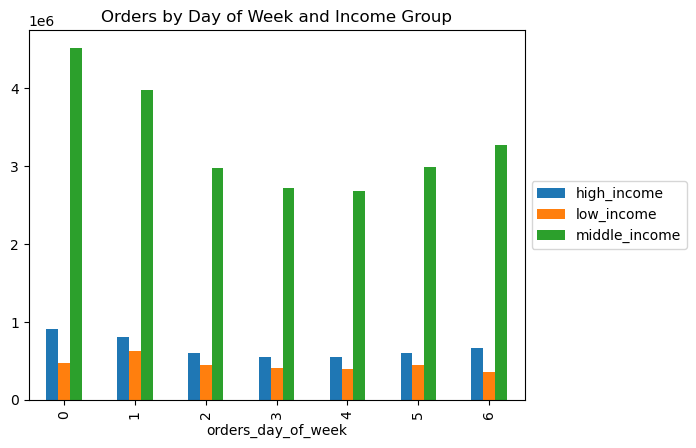

In [68]:
# Create a bar chart between Income Group with orders_day_of_week

income_group_order_days_week_viz = income_group_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [69]:
# Export

income_group_order_days_week_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_order_days_week_viz.png'),bbox_inches='tight')

In [70]:
# Check Income Group with orders_hour_of_day

income_group_order_hour_day = pd.crosstab(orders_products_all['order_hour_of_day'],orders_products_all['income_group'],dropna=False)

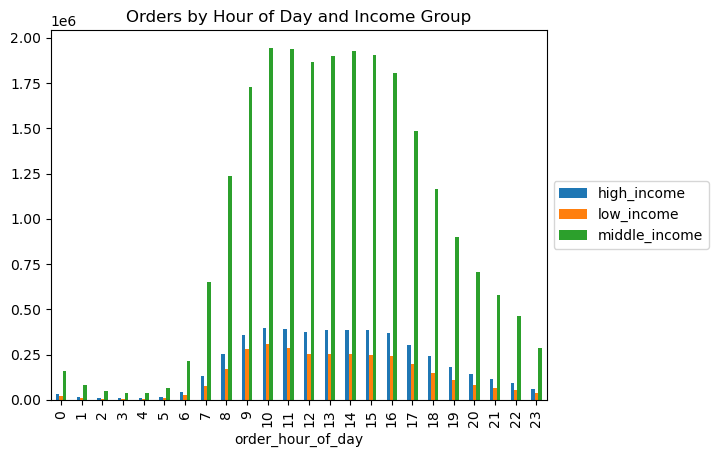

In [71]:
# Create a bar chart between Age Group with orders_day_of_week

income_group_order_hour_day_viz = income_group_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [72]:
# Export

income_group_order_hour_day_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_order_hour_day_viz.png'),bbox_inches='tight')

### d. Number of dependents

In [70]:
# Check family_status_flag with orders_day_of_week

family_status_flag_order_days_week = pd.crosstab(orders_products_all['orders_day_of_week'],orders_products_all['family_status_flag'],dropna=False)

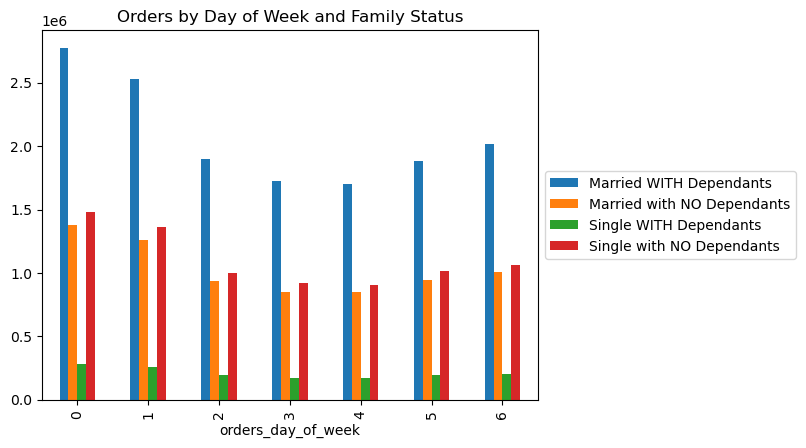

In [86]:
# Create a bar chart between family_status_flag with orders_day_of_week

family_status_flag_order_days_week_viz = family_status_flag_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [87]:
# Export

family_status_flag_order_days_week_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_order_days_week_viz.png'),bbox_inches='tight')

In [88]:
# Check family_status_flag with orders_hour_of_day

family_status_flag_order_hour_day = pd.crosstab(orders_products_all['order_hour_of_day'],orders_products_all['family_status_flag'],dropna=False)

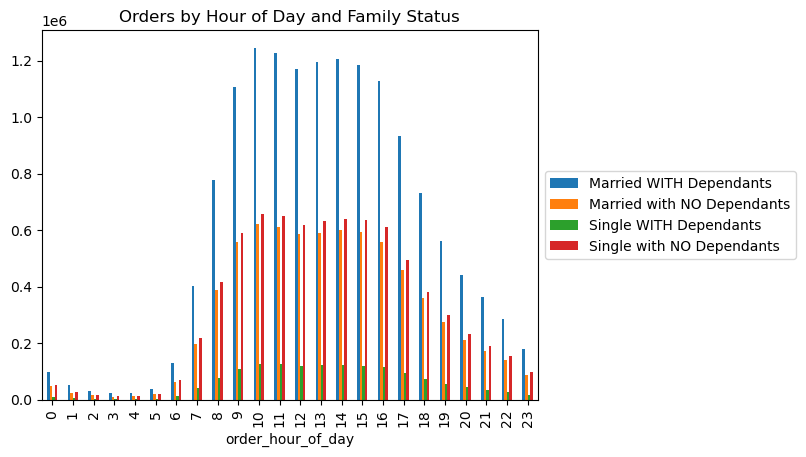

In [89]:
# Create a bar chart between family_status_flag with orders_day_of_week

family_status_flag_order_hour_day_viz = family_status_flag_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [90]:
# Export

family_status_flag_order_hour_day_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_order_hour_day_viz.png'),bbox_inches='tight')

# 6. Create an appropriate visualization to show the distribution of profiles.

## a. Age

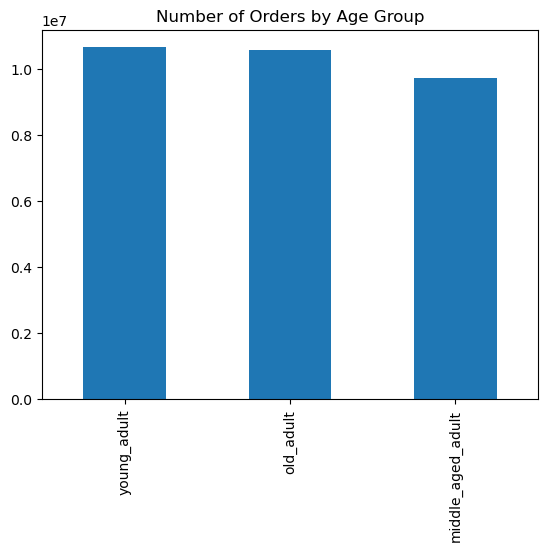

In [91]:
# Create a bar chart

age_bar_chart = orders_products_all['age_group'].value_counts().plot.bar()
plt.title('Number of Orders by Age Group')
plt.show()

In [92]:
# Export

age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar_chart.png'),bbox_inches='tight')

## b. Income

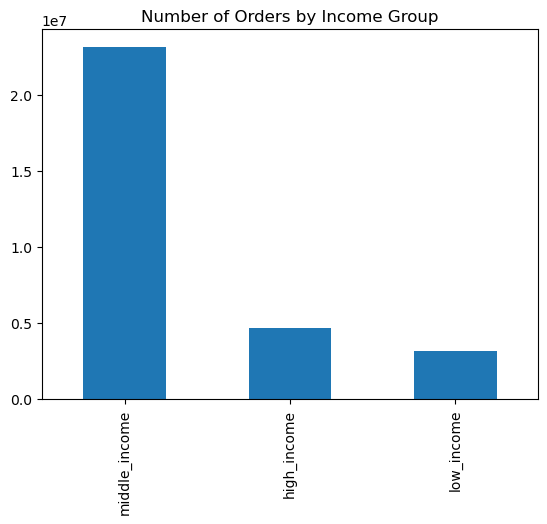

In [93]:
# Create a bar chart

income_bar_chart = orders_products_all['income_group'].value_counts().plot.bar()
plt.title('Number of Orders by Income Group')
plt.show()

In [94]:
# Export

income_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar_chart.png'),bbox_inches='tight')

## c. Department

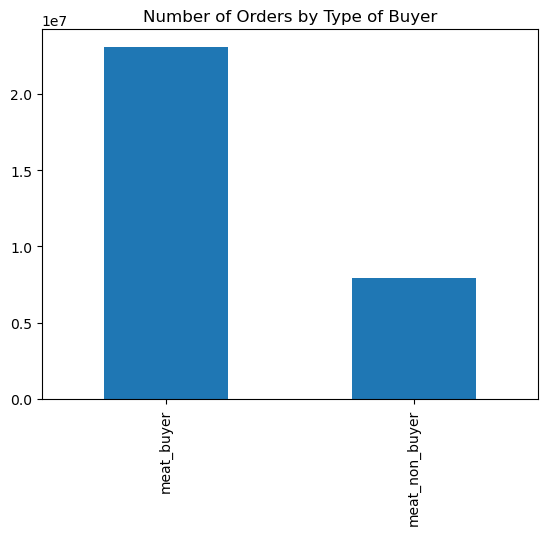

In [73]:
# Create a bar chart

meat_bar_chart = orders_products_all['customer'].value_counts().plot.bar()
plt.title('Number of Orders by Type of Buyer')
plt.show()

In [74]:
# Export

meat_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meat_bar_chart.png'),bbox_inches='tight')

## d. Number of Dependents

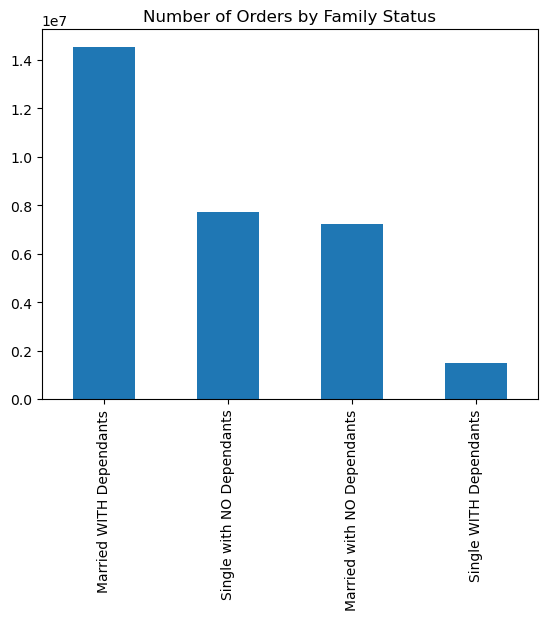

In [99]:
family_status_bar_chart = orders_products_all['family_status_flag'].value_counts().plot.bar()
plt.title('Number of Orders by Family Status')
plt.show()

In [100]:
# Export

family_status_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_bar_chart.png'),bbox_inches='tight')

## e. Region

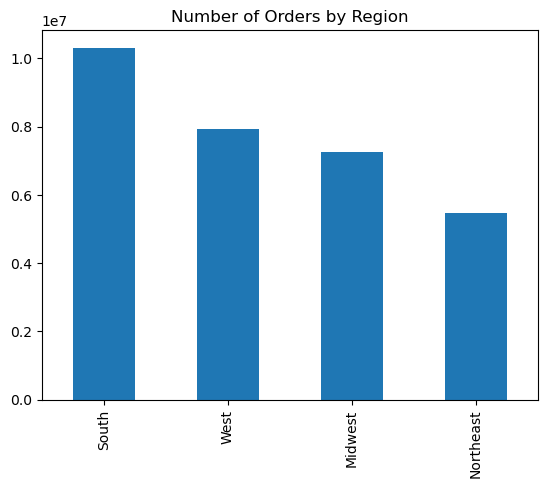

In [75]:
# Create a bar chart

region_bar_chart = orders_products_all['region'].value_counts().plot.bar()
plt.title('Number of Orders by Region')
plt.show()

In [76]:
# Export

region_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar_chart.png'),bbox_inches='tight')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## a. Age

In [77]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_age = orders_products_all.groupby('age_group').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [78]:
crosstab_age

order_id days_since_last_order                  prices  \
                      count                   min       mean   max    min   
age_group                                                                   
middle_aged_adult   9724950                   0.0  10.819702  30.0    1.0   
old_adult          10574504                   0.0  10.800664  30.0    1.0   
young_adult        10665110                   0.0  10.811278  30.0    1.0   

                                   
                       mean   max  
age_group                          
middle_aged_adult  7.791641  25.0  
old_adult          7.795446  25.0  
young_adult        7.784818  25.0

In [79]:
crosstab_age.to_clipboard()

## b. Income

In [80]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_income = orders_products_all.groupby('income_group').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [81]:
crosstab_income

order_id days_since_last_order                  prices  \
                  count                   min       mean   max    min   
income_group                                                            
high_income     4690090                   0.0  10.711185  30.0    1.0   
low_income      3146124                   0.0  11.194265  30.0    1.0   
middle_income  23128350                   0.0  10.778440  30.0    1.0   

                               
                   mean   max  
income_group                   
high_income    7.943054  25.0  
low_income     6.682987  25.0  
middle_income  7.910369  25.0

In [82]:
crosstab_income.to_clipboard()

## c. Departments

In [83]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_customer = orders_products_all.groupby('customer').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [84]:
crosstab_customer

order_id days_since_last_order                 prices  \
                   count                   min      mean   max    min   
customer                                                                
meat_buyer      23065332                   0.0  10.56197  30.0    1.0   
meat_non_buyer   7899232                   0.0  11.54690  30.0    1.0   

                                
                    mean   max  
customer                        
meat_buyer      7.901311  25.0  
meat_non_buyer  7.467293  20.0

In [85]:
crosstab_customer.to_clipboard()

## d. Number of Dependents

In [86]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_dependents = orders_products_all.groupby('family_status_flag').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [87]:
crosstab_dependents

order_id days_since_last_order                   \
                               count                   min       mean   max   
family_status_flag                                                            
Married WITH Dependants     14532650                   0.0  10.823958  30.0   
Married with NO Dependants   7211061                   0.0  10.814660  30.0   
Single WITH Dependants       1481172                   0.0  10.750995  30.0   
Single with NO Dependants    7739681                   0.0  10.791950  30.0   

                           prices                  
                              min      mean   max  
family_status_flag                                 
Married WITH Dependants       1.0  7.787643  25.0  
Married with NO Dependants    1.0  7.795589  25.0  
Single WITH Dependants        1.0  7.800604  25.0  
Single with NO Dependants     1.0  7.789550  25.0

In [88]:
crosstab_dependents.to_clipboard()

## e. Region

In [121]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_region = orders_products_all.groupby('region').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [122]:
crosstab_region

order_id days_since_last_order                  prices            \
              count                   min       mean   max    min      mean   
region                                                                        
Midwest     7261513                   0.0  10.892735  30.0    1.0  7.792318   
Northeast   5464685                   0.0  10.774220  30.0    1.0  7.781441   
South      10311139                   0.0  10.814227  30.0    1.0  7.794439   
West        7927227                   0.0  10.754622  30.0    1.0  7.790308   

                 
            max  
region           
Midwest    25.0  
Northeast  25.0  
South      25.0  
West       25.0

In [7]:
crosstab_region.to_clipboard()

## f. Loyalty Flag

In [118]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_loyalty_flag = orders_products_all.groupby('loyalty_flag').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [119]:
crosstab_loyalty_flag

order_id days_since_last_order                  prices  \
                     count                   min       mean   max    min   
loyalty_flag                                                               
Loyal customer    10284093                   0.0   6.026656  30.0    1.0   
New customer       4803695                   0.0  17.598692  30.0    1.0   
Regular customer  15876776                   0.0  12.155136  30.0    1.0   

                                  
                      mean   max  
loyalty_flag                      
Loyal customer    7.773574  25.0  
New customer      7.801665  25.0  
Regular customer  7.798262  25.0

In [120]:
crosstab_loyalty_flag.to_clipboard()

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## 8.1 Loyalty Flag

### a. Age - compared with loyalty_flag

In [137]:
# Check customer profile with Region

age_loyalty = pd.crosstab(orders_products_all['loyalty_flag'],orders_products_all['age_group'],dropna=False)

In [138]:
age_loyalty = age_loyalty.sort_values(by=['young_adult'], ascending=True)

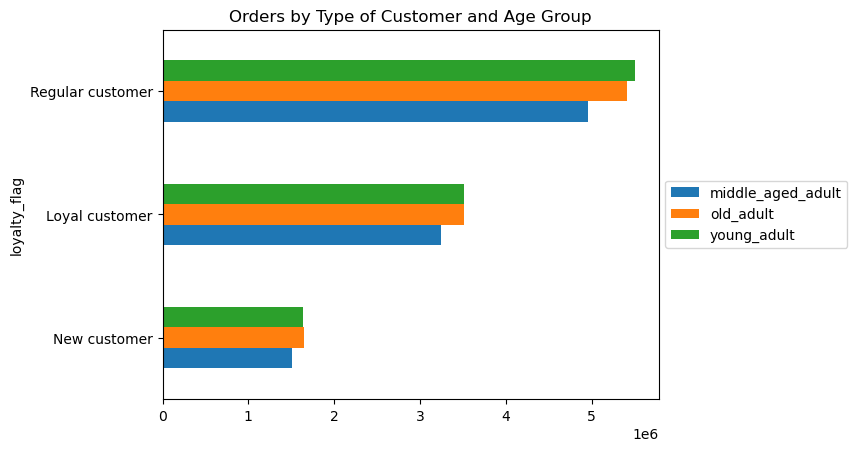

In [139]:
age_loyalty = age_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [140]:
# Export

age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyalty_viz.png'),bbox_inches='tight')

In [127]:
# Check customer profile with Region

crosstab_age_loyalty = orders_products_all.groupby(['loyalty_flag','age_group']).agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [128]:
crosstab_age_loyalty

order_id days_since_last_order    prices
                                      count                  mean      mean
loyalty_flag     age_group                                                 
Loyal customer   middle_aged_adult  3249934              6.041354  7.774595
                 old_adult          3514773              6.013649  7.778460
                 young_adult        3519386              6.026071  7.767755
New customer     middle_aged_adult  1513986             17.662170  7.798844
                 old_adult          1649975             17.594326  7.810576
                 young_adult        1639734             17.544489  7.795302
Regular customer middle_aged_adult  4961030             12.167239  7.800610
                 old_adult          5409756             12.141023  7.801868
                 young_adult        5505990             12.158092  7.792603

In [129]:
crosstab_age_loyalty.to_clipboard()

### b. Income - compared with loyalty_flag

In [95]:
# Check customer profile with Region

income_loyalty = pd.crosstab(orders_products_all['loyalty_flag'],orders_products_all['income_group'],dropna=False)

In [100]:
income_loyalty = income_loyalty.sort_values(by=['high_income'], ascending=True)

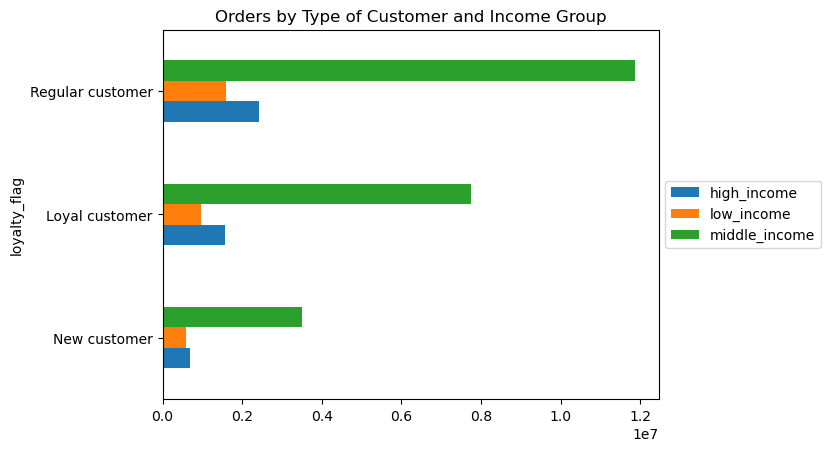

In [101]:
income_loyalty_viz = income_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [102]:
# Export

income_loyalty_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_loyalty_viz.png'),bbox_inches='tight')

In [152]:
# Check customer profile with Region

crosstab_income_loyalty = orders_products_all.groupby(['loyalty_flag','income_group']).agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [153]:
crosstab_income_loyalty

order_id days_since_last_order    prices
                                   count                  mean      mean
loyalty_flag     income_group                                           
Loyal customer   high_income     1570525              6.002562  7.906732
                 low_income       963399              6.020463  6.697138
                 middle_income   7750169              6.032310  7.880422
New customer     high_income      700332             17.570471  8.004525
                 low_income       589972             17.660482  6.604579
                 middle_income   3513391             17.593969  7.962293
Regular customer high_income     2419233             12.071418  7.948843
                 low_income      1592753             12.270181  6.703471
                 middle_income  11864790             12.156780  7.914557

In [154]:
crosstab_income_loyalty.to_clipboard()

### d. Number of Dependents - compared with loyalty_flag

In [110]:
# Check customer profile with Region

family_status_flag_loyalty = pd.crosstab(orders_products_all['loyalty_flag'],orders_products_all['family_status_flag'],dropna=False)

In [111]:
family_status_flag_loyalty = family_status_flag_loyalty.sort_values(by=['Single WITH Dependants'], ascending=True)

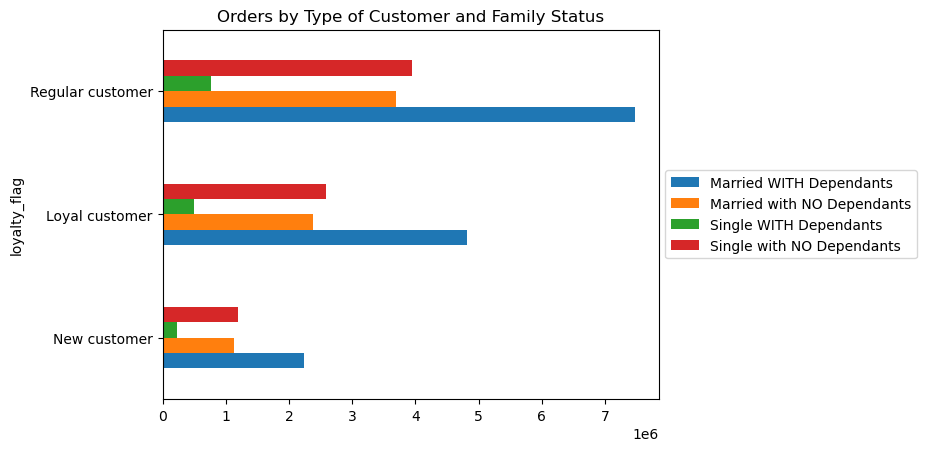

In [112]:
family_status_flag_loyalty = family_status_flag_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [155]:
# Export

family_status_flag_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_loyalty.png'),bbox_inches='tight')

In [158]:
# Check customer profile with Region

crosstab_family_loyalty = orders_products_all.groupby(['loyalty_flag','family_status_flag']).agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [159]:
crosstab_family_loyalty

order_id days_since_last_order  \
                                               count                  mean   
loyalty_flag     family_status_flag                                          
Loyal customer   Married WITH Dependants     4816927              6.040446   
                 Married with NO Dependants  2385573              6.049878   
                 Single WITH Dependants       492749              5.996416   
                 Single with NO Dependants   2588844              5.985362   
New customer     Married WITH Dependants     2244509             17.602003   
                 Married with NO Dependants  1136142             17.535976   
                 Single WITH Dependants       221779             17.747854   
                 Single with NO Dependants   1201265             17.624283   
Regular customer Married WITH Dependants     7471214             12.169486   
                 Married with NO Dependants  3689346             12.126607   
                 Single WITH Dependants       766644             12.078751   
                 Single with NO Dependants   3949572             12.169461   

                                               prices  
                                                 mean  
loyalty_flag     family_status_flag                    
Loyal customer   Married WITH Dependants     7.766522  
                 Married with NO Dependants  7.773973  
                 Single WITH Dependants      7.802992  
                 Single with NO Dependants   7.780731  
New customer     Married WITH Dependants     7.800090  
                 Married with NO Dependants  7.808444  
                 Single WITH Dependants      7.806410  
                 Single with NO Dependants   7.797321  
Regular customer Married WITH Dependants     7.797523  
                 Married with NO Dependants  7.805608  
                 Single WITH Dependants      7.797390  
                 Single with NO Dependants   7.792967

In [160]:
crosstab_family_loyalty.to_clipboard()

### e. Regions - compared with loyalty_flag

In [161]:
# Check customer profile with Region

region_flag_loyalty = pd.crosstab(orders_products_all['loyalty_flag'],orders_products_all['region'],dropna=False)

In [162]:
region_flag_loyalty = region_flag_loyalty.sort_values(by=['South'], ascending=True)

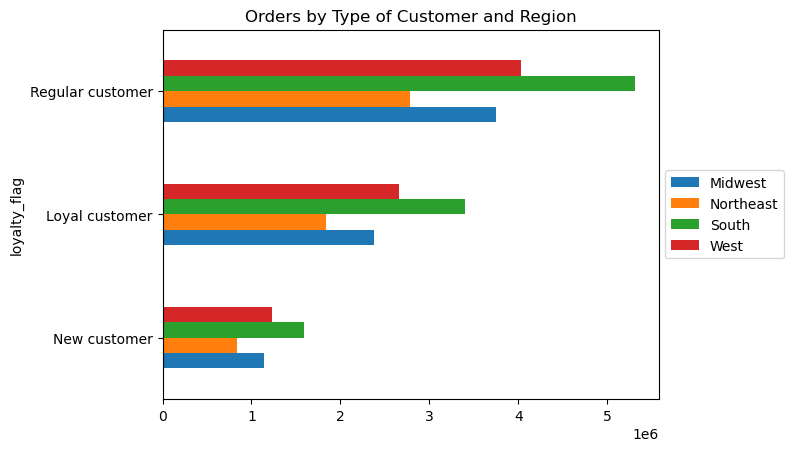

In [163]:
region_flag_loyalty = region_flag_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [164]:
# Export

region_flag_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_flag_loyalty.png'),bbox_inches='tight')

In [165]:
# Check customer profile with Region

crosstab_regions_loyalty = orders_products_all.groupby(['loyalty_flag','region']).agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [166]:
crosstab_regions_loyalty

order_id days_since_last_order    prices
                              count                  mean      mean
loyalty_flag     region                                            
Loyal customer   Midwest    2373774              6.063496  7.775409
                 Northeast  1841785              6.038116  7.766938
                 South      3405844              6.013278  7.778081
                 West       2662690              6.003008  7.770766
New customer     Midwest    1136761             17.551746  7.805742
                 Northeast   842156             17.591412  7.784198
                 South      1593664             17.638790  7.804396
                 West       1231114             17.595087  7.806312
Regular customer Midwest    3750978             12.226795  7.798951
                 Northeast  2780744             12.149573  7.790212
                 South      5311631             12.143620  7.801941
                 West       4033423             12.107515  7.798325

In [167]:
crosstab_regions_loyalty.to_clipboard()

### e. Regions - compared with departments

In [123]:
# Check customer profile with Region

region_departments = pd.crosstab(orders_products_all['department'],orders_products_all['region'],dropna=False)

In [124]:
region_departments = region_departments.sort_values(by=['South'], ascending=True)

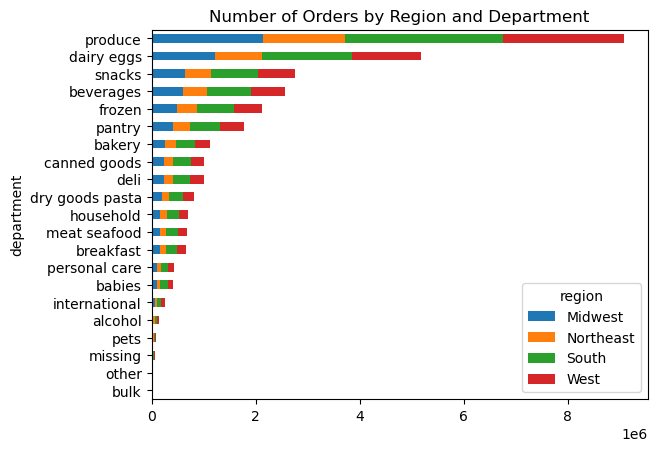

In [125]:
# Visualizing the result with a Bar Chart

region_departments_png = region_departments.plot.barh(stacked = True)
plt.title('Number of Orders by Region and Department')
plt.show()

In [126]:
# Export

region_departments_png.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_departments_png.png'),bbox_inches='tight')

In [147]:
# Check customer profile with Region

crosstab_regions_department = orders_products_all.groupby(['region','department']).agg({'order_id':['count'],'days_since_last_order':['mean'],  'prices':['mean']})

In [148]:
crosstab_regions_department

order_id days_since_last_order    prices
                         count                  mean      mean
region  department                                            
Midwest alcohol          34043              9.945947  8.132306
        babies           95741              9.865566  7.606518
        bakery          261753             10.929425  7.863385
        beverages       598979             10.912874  7.685149
        breakfast       156155             11.070668  8.023741
...                        ...                   ...       ...
West    pantry          457886             10.790674  8.019490
        personal care   106647             11.188721  8.004448
        pets             24059             11.990746  7.964113
        produce        2324678             10.513797  7.977962
        snacks          711329             10.612754  4.281487

[84 rows x 3 columns]

In [149]:
crosstab_regions_department.to_clipboard()

## 8.2 Meat Seafood Customer

### a. Age - compared with Meat Seafood Buyer

In [194]:
# Check customer profile with Region

age_customer = pd.crosstab(orders_products_all['age_group'],orders_products_all['customer'],dropna=False)

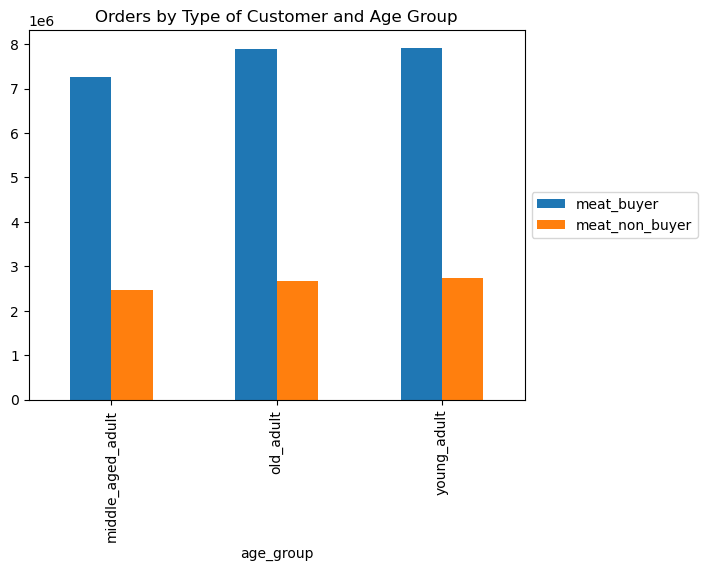

In [195]:
age_customer = age_customer.plot.bar()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [196]:
# Export

age_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_customer.png'),bbox_inches='tight')

### b. Income - compared with Meat Buyer

In [197]:
# Check customer profile with Region

income_customer = pd.crosstab(orders_products_all['income_group'],orders_products_all['customer'],dropna=False)

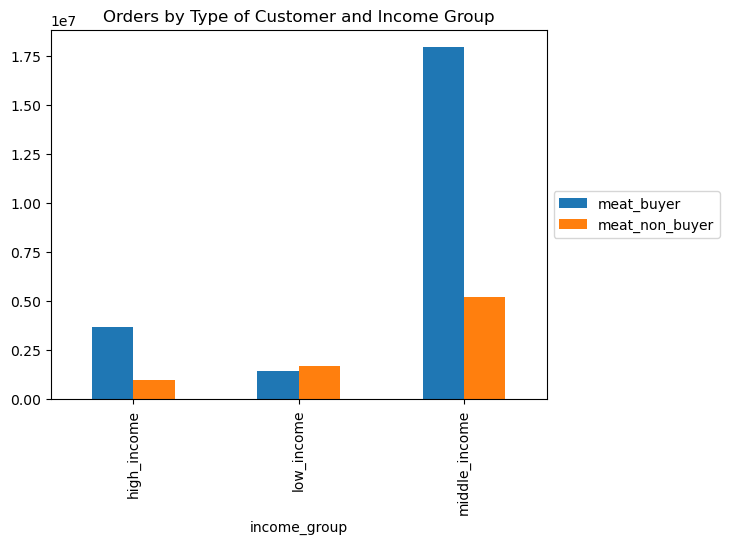

In [198]:
income_customer_viz = income_customer.plot.bar()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [200]:
# Export

income_customer_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_customer_viz.png'),bbox_inches='tight')

### d. Number of Dependents - compared with Meat Buyer

In [201]:
# Check customer profile with Region

family_status_flag_customer = pd.crosstab(orders_products_all['family_status_flag'],orders_products_all['customer'],dropna=False)

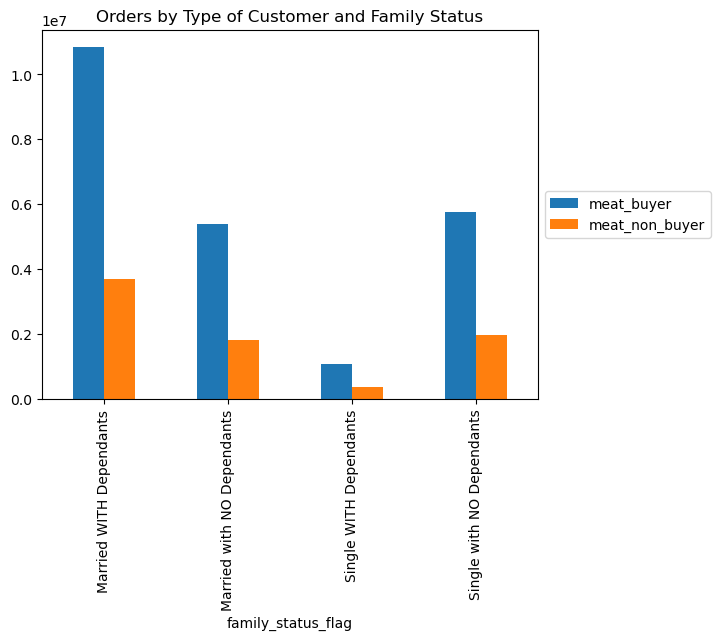

In [202]:
family_status_flag_customer = family_status_flag_customer.plot.bar()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [203]:
# Export

family_status_flag_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_customer.png'),bbox_inches='tight')

### e. Regions - compared with Meat Buyer

In [207]:
# Check customer profile with Region

region_flag_customer = pd.crosstab(orders_products_all['region'],orders_products_all['customer'],dropna=False)

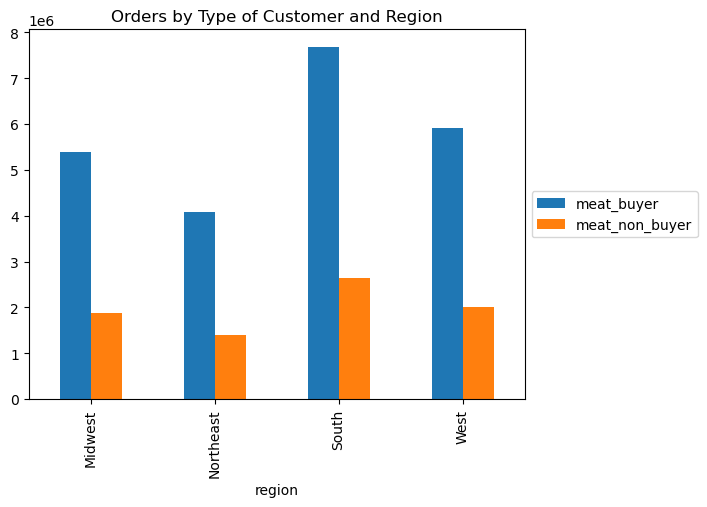

In [208]:
region_flag_customer = region_flag_customer.plot.bar()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [209]:
# Export

region_flag_customer.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_flag_customer.png'),bbox_inches='tight')

## 8.3 Snack Customer

### a. Age - compared with Snack Buyer

In [215]:
# Check customer profile with Region

age_snacks = pd.crosstab(orders_products_all['age_group'],orders_products_all['customer_snacks'],dropna=False)

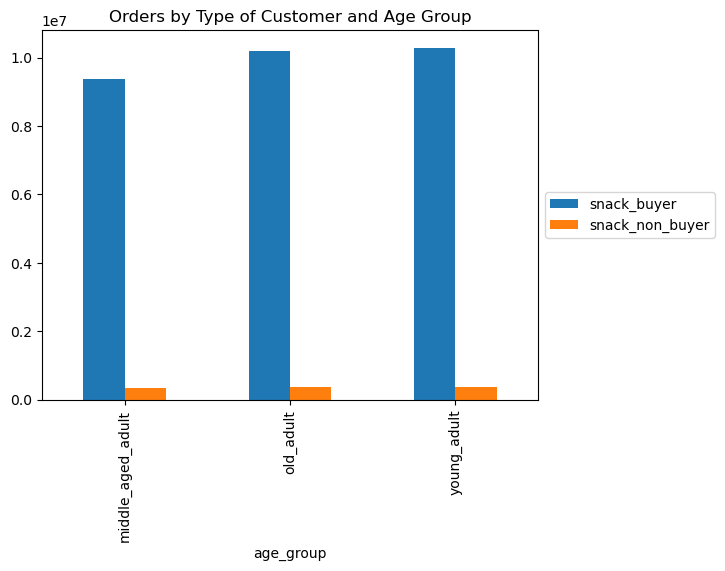

In [216]:
age_snacks = age_snacks.plot.bar()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [217]:
# Export

age_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_snacks.png'),bbox_inches='tight')

### b. Income - compared with Snack Buyer

In [218]:
# Check customer profile with Region

income_snacks = pd.crosstab(orders_products_all['income_group'],orders_products_all['customer_snacks'],dropna=False)

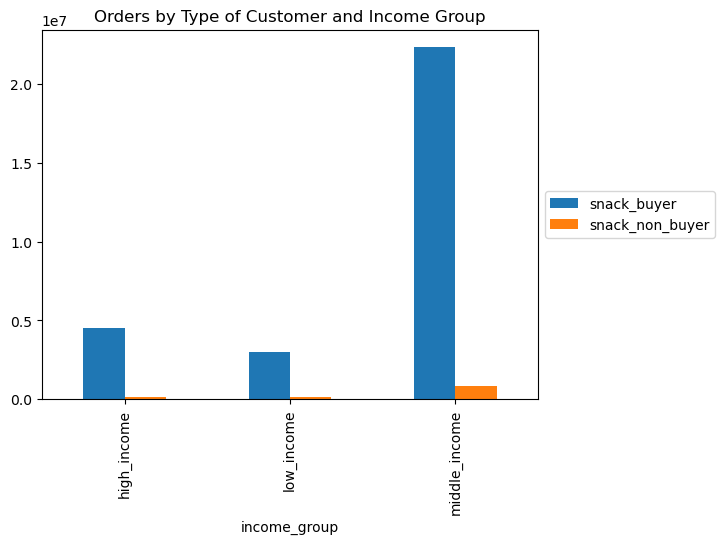

In [219]:
income_snacks = income_snacks.plot.bar()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [220]:
# Export

income_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_snacks.png'),bbox_inches='tight')

### d. Number of Dependents - compared with Snack Buyer

In [221]:
# Check customer profile with Region

family_status_flag_snacks = pd.crosstab(orders_products_all['family_status_flag'],orders_products_all['customer_snacks'],dropna=False)

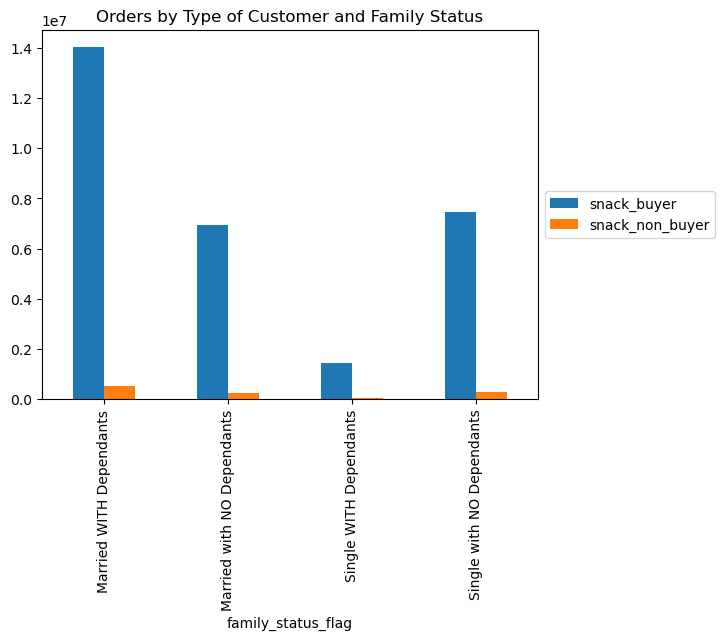

In [222]:
family_status_flag_snacks = family_status_flag_snacks.plot.bar()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [223]:
# Export

family_status_flag_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_flag_snacks.png'),bbox_inches='tight')

### e. Regions - compared with Snack Buyer

In [224]:
# Check customer profile with Region

region_flag_snacks = pd.crosstab(orders_products_all['region'],orders_products_all['customer_snacks'],dropna=False)

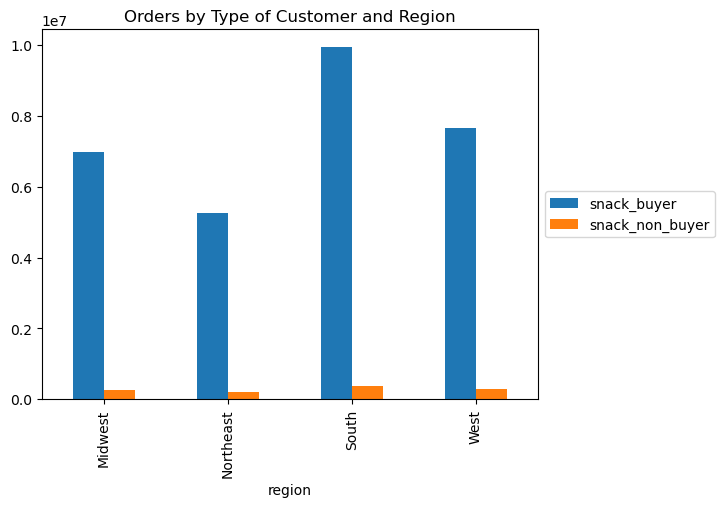

In [225]:
region_flag_snacks = region_flag_snacks.plot.bar()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [226]:
# Export

region_flag_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_flag_snacks.png'),bbox_inches='tight')

# Export

In [227]:
# Export to pickle file

orders_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

In [4]:
# Import dataset

orders_products_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

In [5]:
orders_products_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                object 
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int32  
 7   add_to_cart_order      int8   
 8   reordered              int8   
 9   product_name           object 
 10  aisle_id               int8   
 11  department_id          int8   
 12  prices                 float32
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  loyalty_flag           object 
 17  spending_flag          object 
 18  frequency_flag         object 
 19  gender                 object 
 20  state                  object 
 21  age                    int8   
 22  date_joined     